In [14]:
#1 Importing the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
#2 Importing the dataset:
dataset = pd.read_csv("D:\My personal project\kc_house_data.csv")
#Y: dependent variable vector
#In the first run X’s type is object due to the different types of #independent variables.State column contains categorical variables
X= dataset.iloc[:, :-1].values
Y=dataset.iloc[:, 4].values
#3 Encoding the categorical variables:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
#Change the text into numbers 0,1,2
X[: ,3]= labelencoder_X.fit_transform(X[: ,3])
onehotencoder= OneHotEncoder(categorical_features=[3])
#turn the numbers to dummy variables. Each column represents one #state compare the X and dataset tables to understand the #relationship between the state and the columns
X= onehotencoder.fit_transform(X).toarray()
#4 Avoid the dummy variables trap
#Delete the first column represent the California
X= X[:, 1:]
#5 Splitting the dataset into the Training and Test dataset
#train_set_split: Split arrays or matrices into random train and #test subsets. %20 of the dataset to the test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=0)
#6 Fit multiple Linear Regression model to our Train set
from sklearn.linear_model import LinearRegression
#Create an object called regressor in the LinearRegression class…
regressor = LinearRegression()
#Fit the linear regression model to the training set… We use the fit #method the arguments of the fit method will be training sets
 
regressor.fit(X_train,Y_train)
#7 Predicting the Test set results:
y_pred= regressor.predict(X_test)

TypeError: __init__() got an unexpected keyword argument 'categorical_features'

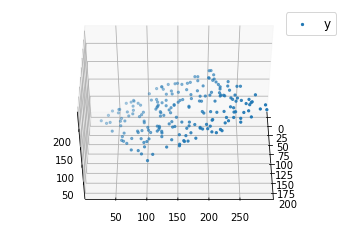

In [15]:
import numpy as np 
import matplotlib as mpl 
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 

def generate_dataset(n): 
	x = [] 
	y = [] 
	random_x1 = np.random.rand() 
	random_x2 = np.random.rand() 
	for i in range(n): 
		x1 = i 
		x2 = i/2 + np.random.rand()*n 
		x.append([1, x1, x2]) 
		y.append(random_x1 * x1 + random_x2 * x2 + 1) 
	return np.array(x), np.array(y) 

x, y = generate_dataset(200) 

mpl.rcParams['legend.fontsize'] = 12

fig = plt.figure() 
ax = fig.gca(projection ='3d') 

ax.scatter(x[:, 1], x[:, 2], y, label ='y', s = 5) 
ax.legend() 
ax.view_init(45, 0) 

plt.show() 


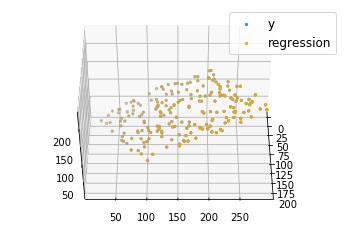

In [16]:
def mse(coef, x, y): 
	return np.mean((np.dot(x, coef) - y)**2)/2

def gradients(coef, x, y): 
	return np.mean(x.transpose()*(np.dot(x, coef) - y), axis = 1) 

def multilinear_regression(coef, x, y, lr, b1 = 0.9, b2 = 0.999, epsilon = 1e-8): 
	prev_error = 0
	m_coef = np.zeros(coef.shape) 
	v_coef = np.zeros(coef.shape) 
	moment_m_coef = np.zeros(coef.shape) 
	moment_v_coef = np.zeros(coef.shape) 
	t = 0

	while True: 
		error = mse(coef, x, y) 
		if abs(error - prev_error) <= epsilon: 
			break
		prev_error = error 
		grad = gradients(coef, x, y) 
		t += 1
		m_coef = b1 * m_coef + (1-b1)*grad 
		v_coef = b2 * v_coef + (1-b2)*grad**2
		moment_m_coef = m_coef / (1-b1**t) 
		moment_v_coef = v_coef / (1-b2**t) 

		delta = ((lr / moment_v_coef**0.5 + 1e-8) *
				(b1 * moment_m_coef + (1-b1)*grad/(1-b1**t))) 

		coef = np.subtract(coef, delta) 
	return coef 

coef = np.array([0, 0, 0]) 
c = multilinear_regression(coef, x, y, 1e-1) 
fig = plt.figure() 
ax = fig.gca(projection ='3d') 

ax.scatter(x[:, 1], x[:, 2], y, label ='y', 
				s = 5, color ="dodgerblue") 

ax.scatter(x[:, 1], x[:, 2], c[0] + c[1]*x[:, 1] + c[2]*x[:, 2], 
					label ='regression', s = 5, color ="orange") 

ax.view_init(45, 0) 
ax.legend() 
plt.show() 


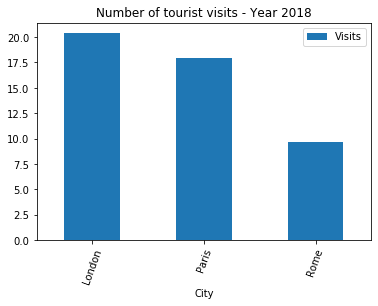

In [1]:

import pandas as pd

import matplotlib.pyplot as plot

 

# A python dictionary

data = {"City":["London", "Paris", "Rome"],

        "Visits":[20.42,17.95,9.7]

        };

# Dictionary loaded into a DataFrame       

dataFrame = pd.DataFrame(data=data);

 

# Draw a vertical bar chart

dataFrame.plot.bar(x="City", y="Visits", rot=70, title="Number of tourist visits - Year 2018");

plot.show(block=True)